In [31]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [32]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [33]:
len(X_train)

60000

In [34]:
len(X_test)

10000

In [35]:
X_train[0].shape

(28, 28)

In [36]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [37]:
X_train.shape

(60000, 28, 28)

In [38]:
X_train = X_train / 255
X_test = X_test / 255

In [39]:
X_train[0].shape

(28, 28)

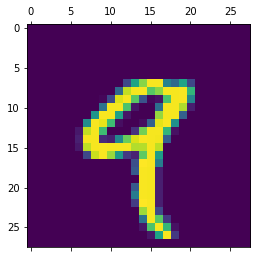

In [40]:
plt.matshow(X_train[4])

In [41]:
y_train[4]

9

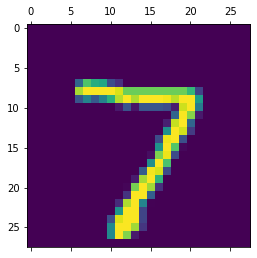

In [42]:
plt.matshow(X_test[0])

In [43]:
y_test[0]

7

In [44]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape
X_test_flattened.shape

(10000, 784)

In [45]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [46]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4669 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3033 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2662 - accuracy: 0.9261


In [47]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2662 - accuracy: 0.9254


[0.266203373670578, 0.9254000186920166]

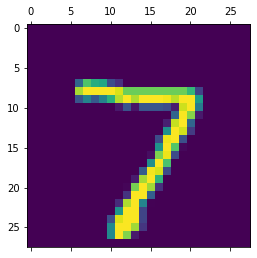

In [49]:
plt.matshow(X_test[0])

In [50]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([1.6874641e-02, 4.6356436e-07, 7.9533964e-02, 9.6288276e-01,
       3.0342245e-03, 1.2075746e-01, 1.1196219e-06, 9.9983698e-01,
       9.7145237e-02, 7.0123738e-01], dtype=float32)

In [54]:
np.argmax(y_predicted[6])

4

In [53]:
y_predicted[6]

array([5.0662528e-04, 5.4805743e-05, 2.2601981e-04, 4.7976717e-02,
       9.9751532e-01, 5.0858396e-01, 1.0834826e-02, 2.2892398e-01,
       7.6680720e-01, 7.6588929e-01], dtype=float32)

In [55]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [56]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [58]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    1,    2,    0,    5,    8,    2,    3,    1],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   6,    9,  920,   20,    8,    4,   13,    9,   38,    5],
       [   1,    0,   14,  936,    1,   19,    2,    8,   20,    9],
       [   2,    1,    3,    1,  912,    0,   10,    3,   10,   40],
       [   7,    3,    2,   40,    8,  774,   15,    6,   30,    7],
       [  11,    3,    6,    1,    7,   16,  910,    2,    2,    0],
       [   1,    7,   21,   10,    7,    0,    0,  950,    2,   30],
       [   4,    9,    7,   24,    9,   28,    9,   12,  866,    6],
       [  10,    7,    1,   10,   29,    7,    0,   25,    7,  913]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

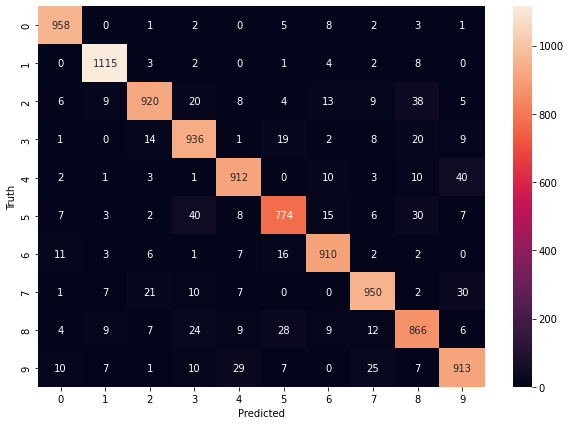

In [59]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [60]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2727 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1272 - accuracy: 0.9622
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0888 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0681 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0535 - accuracy: 0.9836


In [61]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0827 - accuracy: 0.9742


[0.08266670256853104, 0.9742000102996826]

313/313 [==============================] - 1s 3ms/step


Text(69.0, 0.5, 'Truth')

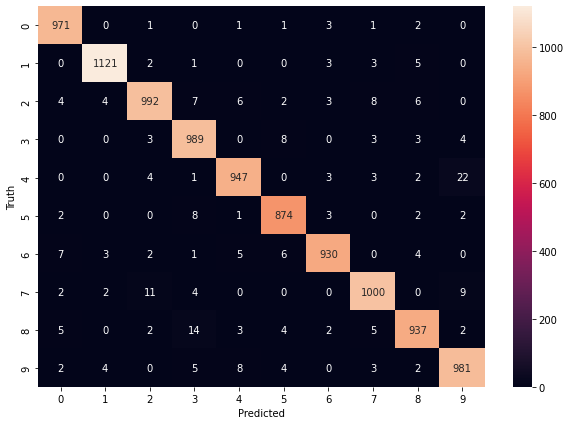

In [62]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')